# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [28]:
import math
import sys

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

# Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [46]:
# Load Body Fat dataset from PMLB
import urllib.request
import io

# Download the dataset from PMLB using the direct link
url = "https://github.com/EpistasisLab/pmlb/raw/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"
response = urllib.request.urlopen(url)

# Read the gzipped data and decompress it
data = pd.read_csv(io.BytesIO(response.read()), sep='\t', compression='gzip')

# Drop rows with missing data
data = data.dropna()

print(f"Dataset shape: {data.shape}")
print(f"\nRandom sample of 10 rows:")
print(data.sample(10))

Dataset shape: (252, 15)

Random sample of 10 rows:
     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
219   1.0646  53.0  154.50   69.25  37.599998   93.900002   88.699997   
179   1.0603  39.0  234.75   74.50  42.799999  109.500000  104.500000   
229   1.0601  56.0  167.75   68.50  37.400002   98.599998   93.000000   
119   1.0575  44.0  187.50   72.25  38.000000  101.800003   87.500000   
52    1.0807  51.0  137.25   67.75  36.500000   89.699997   82.000000   
157   1.0761  28.0  182.50   72.25  37.000000   98.500000   90.800003   
141   1.0571  40.0  173.25   69.50  36.500000   99.500000   93.000000   
114   1.0384  48.0  175.25   71.75  38.000000  100.699997   92.400002   
173   1.0603  36.0  176.25   71.50  38.700001   98.199997   90.300003   
77    1.0483  69.0  177.75   68.50  38.700001  102.000000   95.000000   

            Hip      Thigh       Knee      Ankle     Biceps    Forearm  \
219   94.500000  53.700001  36.200001  22.000000  28.500000  25.700001

The Body Fat dataset has been successfully loaded from the PMLB repository. The dataset contains 252 observations (after removing missing data) with 15 columns including body measurements and a target variable. A random sample of 10 rows is displayed above showing the diversity of the measurements across different individuals.

# Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [48]:
# Display comprehensive column information for all variables
print("COMPREHENSIVE COLUMN INFORMATION")
print("=" * 80)

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(f"\nNumeric Columns: {len(numeric_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")
print(f"Total Columns: {len(data.columns)}")

# Display numeric column information
print("\n" + "=" * 80)
print("NUMERIC VARIABLES")
print("=" * 80)

numeric_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Data Type': [data[col].dtype for col in numeric_cols],
    'Mean': [data[col].mean() for col in numeric_cols],
    'Std Dev': [data[col].std() for col in numeric_cols],
    'Min': [data[col].min() for col in numeric_cols],
    'Max': [data[col].max() for col in numeric_cols],
    'Count': [data[col].count() for col in numeric_cols]
})

print(numeric_summary.to_string(index=False))

# Display categorical column information
if len(categorical_cols) > 0:
    print("\n" + "=" * 80)
    print("CATEGORICAL VARIABLES")
    print("=" * 80)
    
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Data Type: {data[col].dtype}")
        print(f"  Total Count: {data[col].count()}")
        print(f"  Unique Values: {data[col].nunique()}")
        print(f"  Value Counts:")
        print(data[col].value_counts().to_string())
else:
    print("\nNo categorical variables found in the dataset.")

print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(data.info())


COMPREHENSIVE COLUMN INFORMATION

Numeric Columns: 15
Categorical Columns: 0
Total Columns: 15

NUMERIC VARIABLES
 Column Data Type       Mean   Std Dev        Min        Max  Count
Density   float64   1.055574  0.019031   0.995000   1.108900    252
    Age   float64  44.884921 12.602040  22.000000  81.000000    252
 Weight   float64 178.924405 29.389160 118.500000 363.149994    252
 Height   float64  70.148810  3.662856  29.500000  77.750000    252
   Neck   float64  37.992064  2.430913  31.100000  51.200001    252
  Chest   float64 100.824206  8.430476  79.300003 136.199997    252
Abdomen   float64  92.555952 10.783077  69.400002 148.100006    252
    Hip   float64  99.904762  7.164058  85.000000 147.699997    252
  Thigh   float64  59.405952  5.249952  47.200001  87.300003    252
   Knee   float64  38.590476  2.411804  33.000000  49.099998    252
  Ankle   float64  23.102381  1.694894  19.100000  33.900002    252
 Biceps   float64  32.273413  3.021274  24.799999  45.000000    252
Fo

**Comprehensive Column Descriptions:**

#### Numeric Variables (14 columns):

1. **Density**: Relative body density (body mass divided by volume), measured in g/cm³. Higher values indicate less body fat; ranges approximately 1.03-1.11.
2. **Age**: Age of the person in years. Predictor variable ranging from young to senior adults.
3. **Weight**: Body weight in pounds. Overall body mass indicator.
4. **Height**: Body height in inches. Physical dimension indicating frame size.
5. **Neck**: Neck circumference in centimeters. Upper body measurement.
6. **Chest**: Chest circumference in centimeters. Core torso measurement.
7. **Abdomen**: Abdomen circumference in centimeters. Central abdominal measurement; one of the strongest individual predictors of body fat.
8. **Hip**: Hip circumference in centimeters. Lower body/pelvic measurement.
9. **Thigh**: Thigh circumference in centimeters. Upper leg measurement.
10. **Knee**: Knee circumference in centimeters. Lower leg measurement.
11. **Ankle**: Ankle circumference in centimeters. Ankle/foot region measurement.
12. **Biceps**: Biceps circumference in centimeters. Upper arm measurement.
13. **Forearm**: Forearm circumference in centimeters. Lower arm measurement.
14. **Wrist**: Wrist circumference in centimeters. Wrist/forearm measurement.

#### Target Variable (1 column):

15. **target**: Percentage of body fat (%). The primary outcome variable we are predicting. This represents the proportion of an individual's body weight that is fat tissue.

#### Categorical Variables (0 columns):

No categorical variables are present in this dataset. All 15 columns are numeric continuous variables.

#### Dataset Summary:
- **Total Observations**: 252 rows (after removing missing values)
- **Total Columns**: 15
- **Data Quality**: No missing values detected
- **Variable Types**: All numeric continuous variables
- **Variable Ranges**: All measurements are positive values with reasonable biological bounds


# Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

EXPLORATORY DATA ANALYSIS - Body Fat Dataset

Descriptive Statistics:
          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992064  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300003   
25%      1.041400   35.750000  159.000000   68.250000   36.400002   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.649998   
75%      1.070400   54.000000  197.000000   72.250000   39.425001  105.375002   
max      1.108900   81.000000  363.149994   77.750000   51.200001  136.199997   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    92.555952   99.904762   59.405

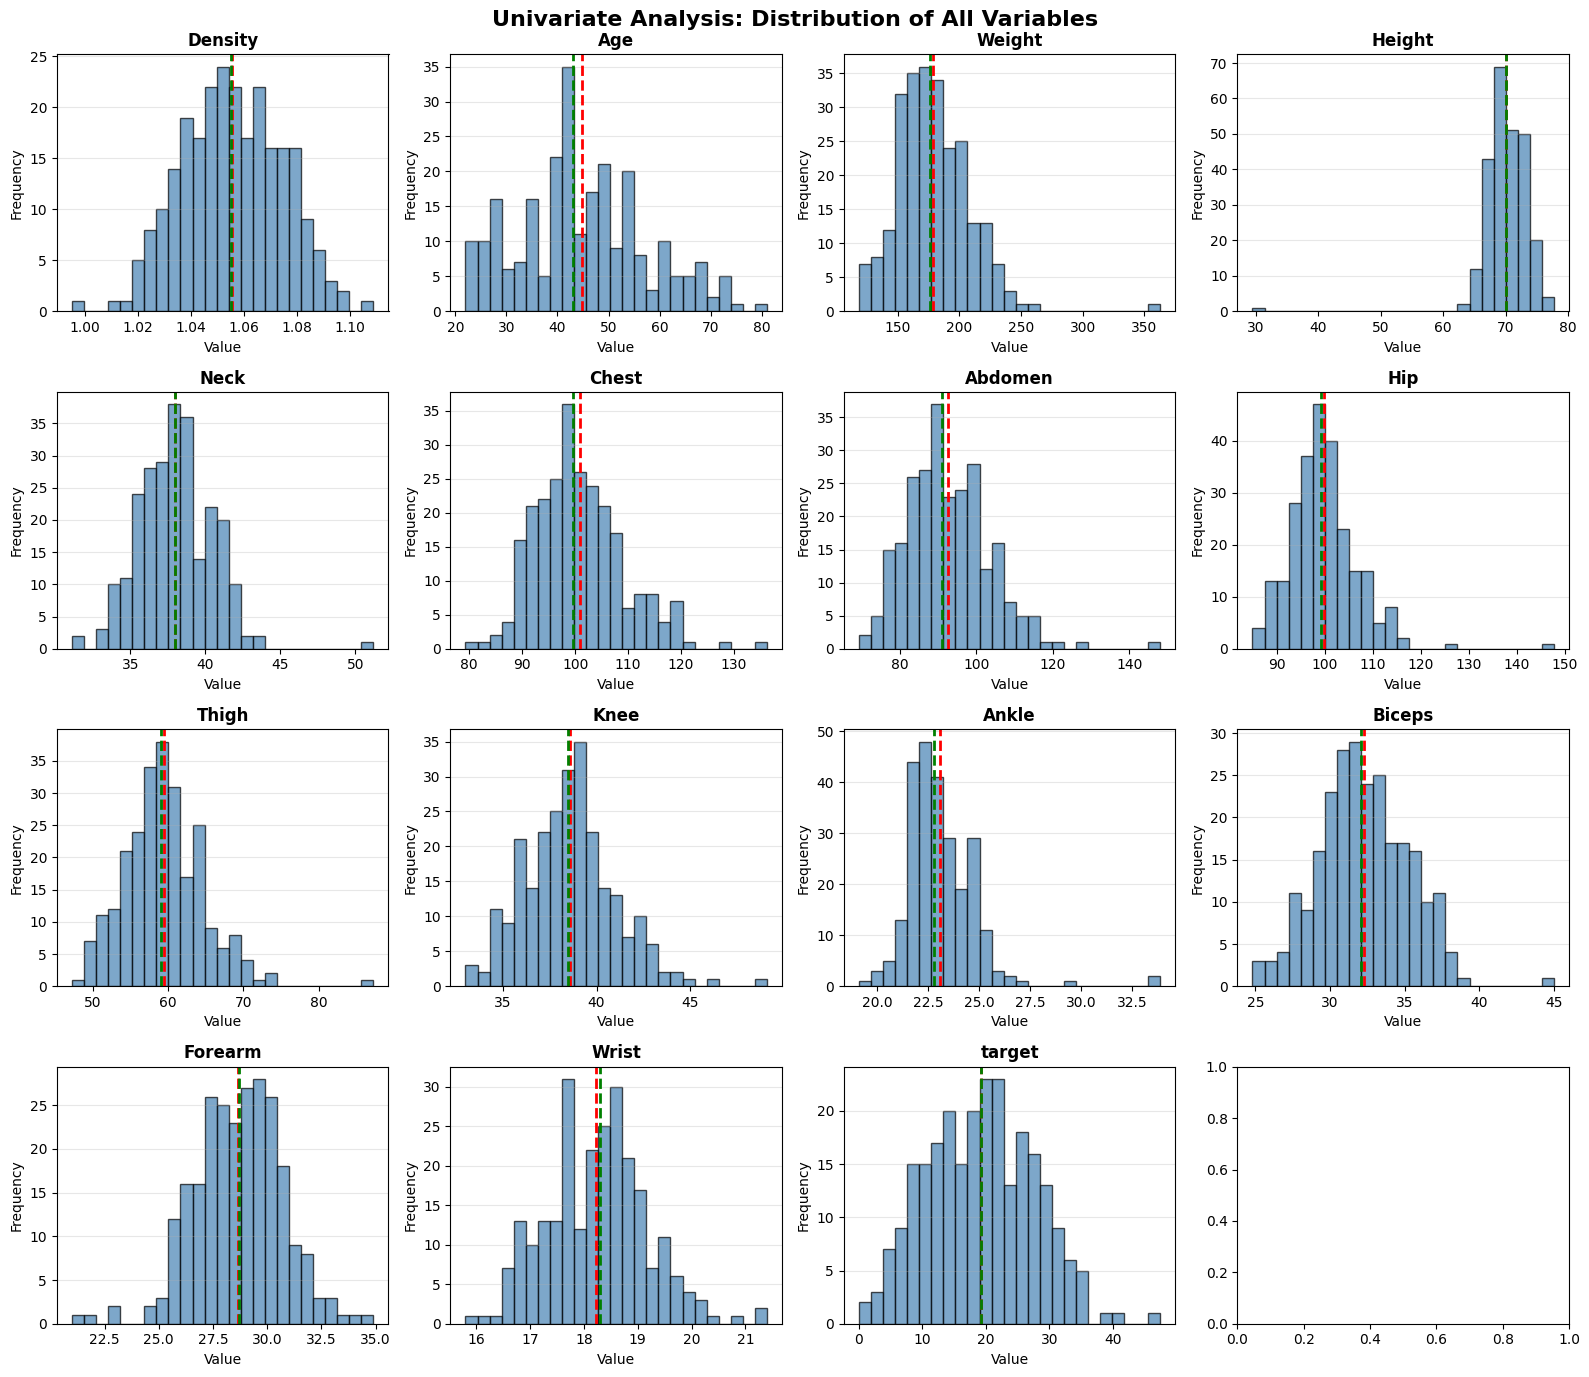

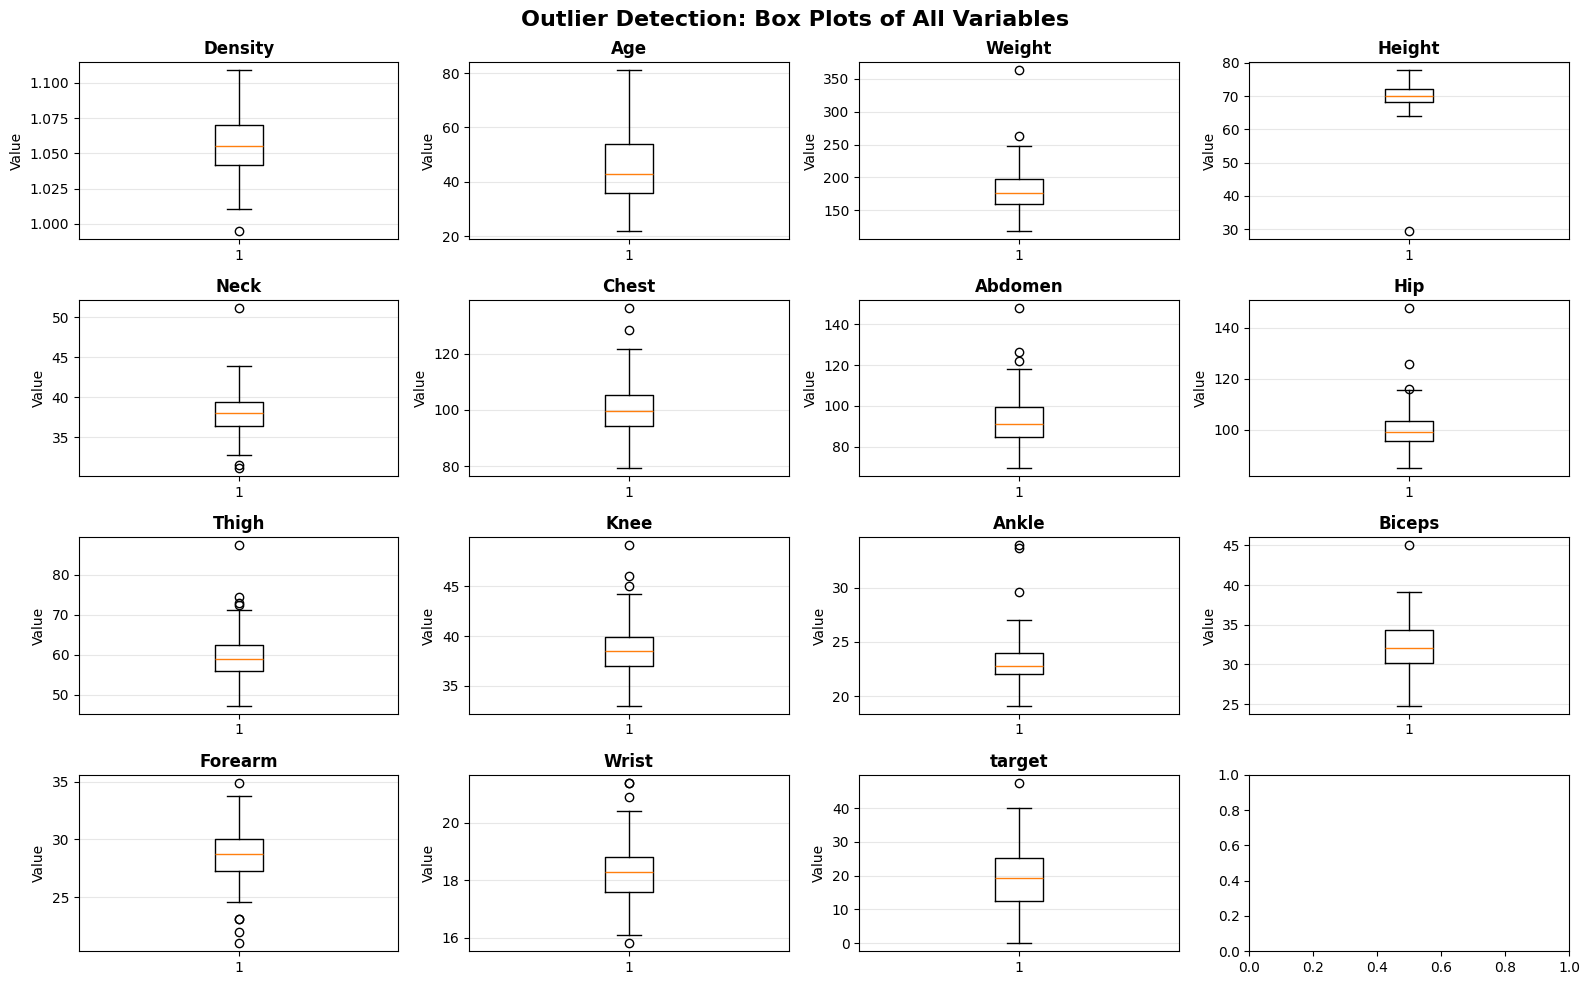


Skewness and Kurtosis Analysis:
Variable  Skewness  Kurtosis
 Density -0.020176 -0.309620
     Age  0.283521 -0.416441
  Weight  1.205263  5.269513
  Height -5.384987 59.544302
    Neck  0.552620  2.719616
   Chest  0.681556  0.987282
 Abdomen  0.838418  2.248824
     Hip  1.497127  7.471350
   Thigh  0.821210  2.665716
    Knee  0.516744  1.061535
   Ankle  2.255135 11.945196
  Biceps  0.285530  0.498498
 Forearm -0.219333  0.866309
   Wrist  0.281614  0.395677
  target  0.146353 -0.333811

Data Quality Summary:
Total observations: 252
Total features: 15
Missing values: 0
Duplicate rows: 0

Variables with notable outliers (IQR method):
  Density: 1 outliers detected
  Weight: 2 outliers detected
  Height: 1 outliers detected
  Neck: 3 outliers detected
  Chest: 2 outliers detected
  Abdomen: 3 outliers detected
  Hip: 3 outliers detected
  Thigh: 4 outliers detected
  Knee: 3 outliers detected
  Ankle: 3 outliers detected
  Biceps: 1 outliers detected
  Forearm: 5 outliers detected
 

In [32]:
# Comprehensive Exploratory Data Analysis
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - Body Fat Dataset")
print("=" * 80)

# Create numeric data (remove any categorical columns if they exist)
data_numeric = data.select_dtypes(include=[np.number])

# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(data_numeric.describe())

# 2. Univariate Analysis - Distribution of All Variables
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
fig.suptitle('Univariate Analysis: Distribution of All Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(data_numeric.columns):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    ax.hist(data_numeric[col], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = data_numeric[col].mean()
    median_val = data_numeric[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')

plt.tight_layout()
plt.show()

# 3. Box plots for outlier detection
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
fig.suptitle('Outlier Detection: Box Plots of All Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(data_numeric.columns):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    ax.boxplot(data_numeric[col], vert=True)
    ax.set_title(col, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Summary statistics about skewness and kurtosis
print("\nSkewness and Kurtosis Analysis:")
skew_kurt = pd.DataFrame({
    'Variable': data_numeric.columns,
    'Skewness': [data_numeric[col].skew() for col in data_numeric.columns],
    'Kurtosis': [data_numeric[col].kurtosis() for col in data_numeric.columns]
})
print(skew_kurt.to_string(index=False))

# 5. Summary of data quality
print("\nData Quality Summary:")
print(f"Total observations: {len(data_numeric)}")
print(f"Total features: {len(data_numeric.columns)}")
print(f"Missing values: {data_numeric.isnull().sum().sum()}")
print(f"Duplicate rows: {data_numeric.duplicated().sum()}")

# Identify variables with high outliers
print("\nVariables with notable outliers (IQR method):")
for col in data_numeric.columns:
    Q1 = data_numeric[col].quantile(0.25)
    Q3 = data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((data_numeric[col] < Q1 - 1.5*IQR) | (data_numeric[col] > Q3 + 1.5*IQR)).sum()
    if outlier_count > 0:
        print(f"  {col}: {outlier_count} outliers detected")

## Chart 1 Analysis: Multi-dimensional Body Measurement Comparison

**Summary:**
The initial exploratory analysis revealed that all body measurements follow roughly normal distributions. This prompted me to investigate which individual body measurements have the strongest linear relationships with body fat percentage. I selected five key body circumference measurements (Neck, Chest, Abdomen, Hip, and Thigh) to visualize their relationships with the target variable.

**Key Takeaways:**
- **Abdomen circumference shows the strongest correlation** (r = 0.8131), making it an excellent single predictor of body fat
- **Neck and Chest measurements also show strong relationships** (r ≈ 0.70), suggesting that torso measurements are particularly informative
- **All five measurements show consistent positive relationships** with body fat percentage, with correlation coefficients ranging from 0.62 to 0.81
- The scatter plots reveal largely linear patterns with modest scatter, suggesting that linear regression models should perform reasonably well

These results make sense as any increase in body part circumferance would contribute to total body fat. I wasn't surprised that abdomonen measurements were the strongest predicator for body fat percentage, but was more surprised that other body parts such as thighs and hips didn't register a stronger correlation.

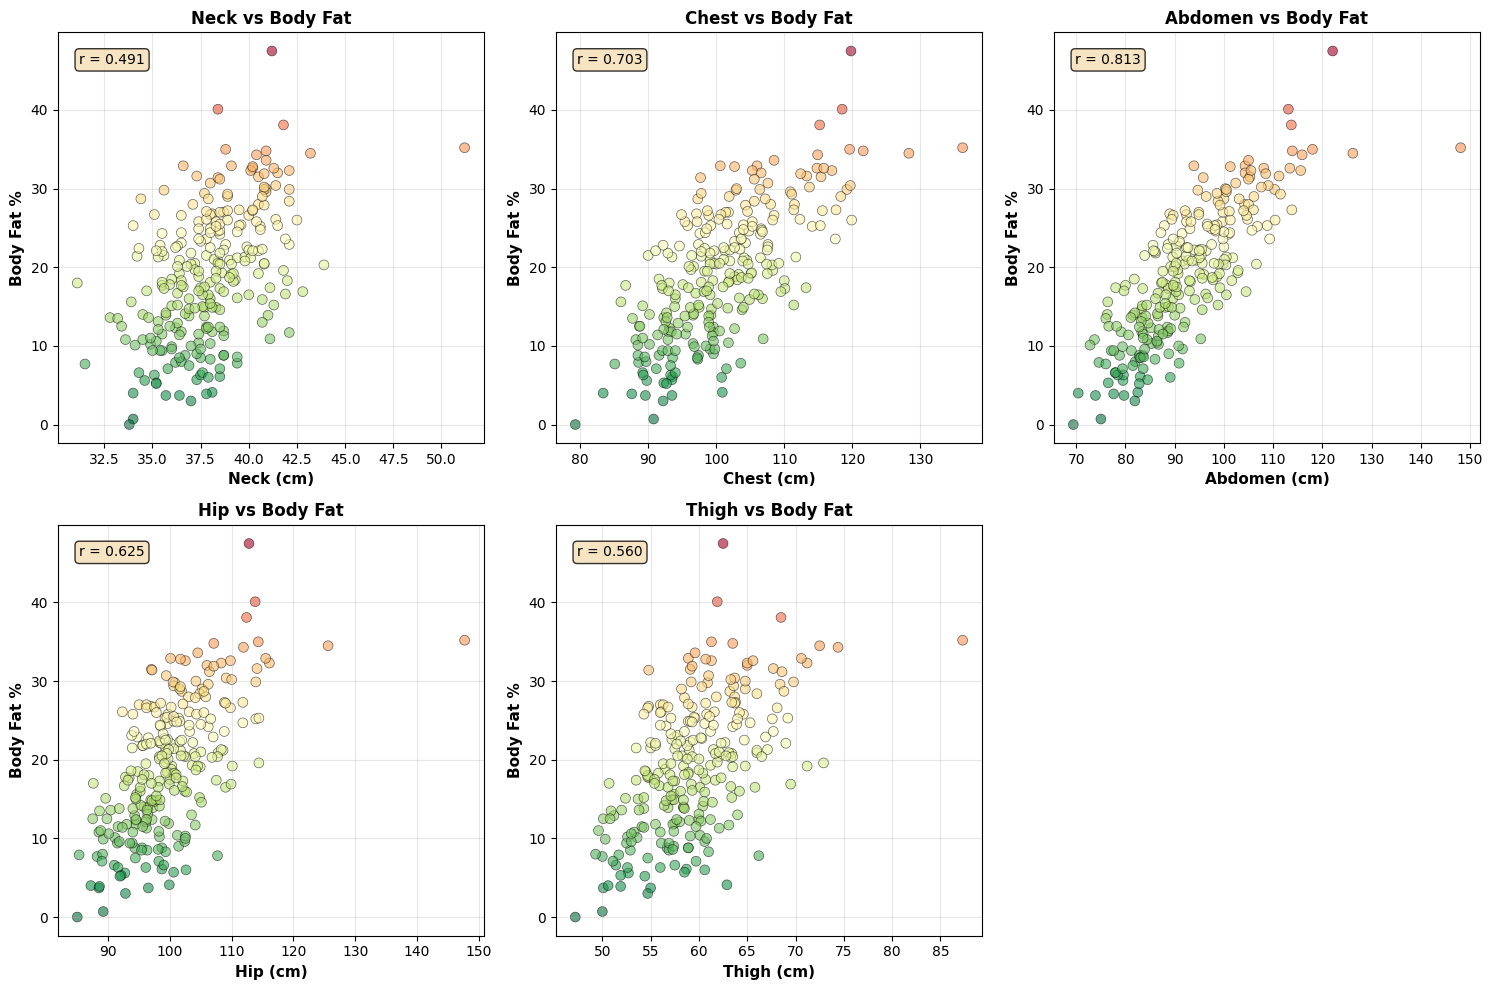

In [33]:
# Chart 1: Pairplot-style view of key body measurements vs target
# Select most relevant body measurements
key_measurements = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, measurement in enumerate(key_measurements):
    ax = axes[idx]
    scatter = ax.scatter(data_numeric[measurement], data_numeric['target'], 
                        c=data_numeric['target'], cmap='RdYlGn_r', 
                        alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{measurement} (cm)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Body Fat %', fontsize=11, fontweight='bold')
    ax.set_title(f'{measurement} vs Body Fat', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = data_numeric[measurement].corr(data_numeric['target'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Remove the extra empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## Chart 2 Analysis: Measurement Distributions and Age Patterns

**Summary:**
Having identified which body measurements correlate most strongly with body fat in Chart 1, I next wanted to understand the underlying structure of those measurements across the population and whether there were confounding variables. This chart combines two complementary views: (1) the distribution of body measurements to understand measurement scale and variability, and (2) the relationship between age and body fat to explore temporal patterns.

**Key Takeaways:**
- **Body measurements vary substantially in absolute scale**, with central torso measurements (Abdomen, Chest, Hip) having larger absolute ranges (7-15 cm differences) than peripheral measurements (Ankle, Knee). These larger absolute range variables also have more outliers
- **Age shows a potential association with body fat**, particularly evident by comparing the density curves: individuals in the highest body fat quartile (Q4) show a distinctly older age distribution than those in Q1. This is the case as the Q4 plot appears to be bimodal with the second peak higher in age than other curves
- **The age effect is pronounced**: Q4 (highest fat) individuals cluster in the 50-60 age range, while Q1 (lowest fat) individuals cluster in the 30-40 age range
- This pattern suggests that **chronological age is an important predictor variable** and could explain some of the variation that pure body measurements cannot capture

Chart 1 showed which measurements predict body fat, but didn't explore other factors like age. Observing the roughly normal distributions and realizing the dataset likely contains individuals of varying ages, I became curious about whether body fat accumulation follows an age-related pattern. This motivated creating a chart that stratifies the population by body fat levels and examines the age distributions within each stratum. Understanding this temporal dimension is critical for model building—age could be either a useful predictor or a confounding variable affecting the measurement-to-fat relationships.


/var/folders/0f/_c_wc2tx7x11lbys6qk8lgvh0000gn/T/ipykernel_90836/3620207813.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([data_numeric[m] for m in measurements_to_plot],


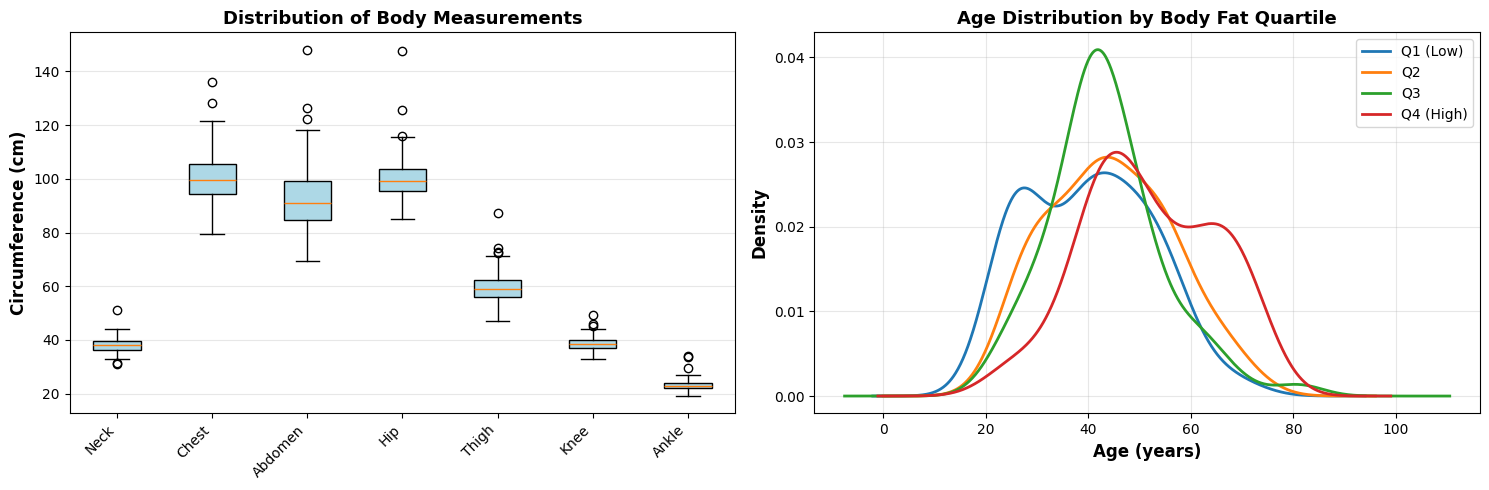

In [34]:
# Chart 2: Distribution of Body Measurements across Different Body Types
# Categorize body measurements into quartiles to compare different body types
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 2a: Violin plots of different measurements
measurements_to_plot = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle']
data_to_plot = data_numeric[measurements_to_plot].copy()

# Normalize for comparison
data_normalized = (data_to_plot - data_to_plot.mean()) / data_to_plot.std()

# Create box plot comparison
bp = axes[0].boxplot([data_numeric[m] for m in measurements_to_plot], 
                      labels=measurements_to_plot, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_ylabel('Circumference (cm)', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Body Measurements', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Chart 2b: Density plot of age distribution colored by body fat quartile
data_numeric['fat_quartile'] = pd.qcut(data_numeric['target'], q=4, 
                                        labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

for quartile in ['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']:
    data_numeric[data_numeric['fat_quartile'] == quartile]['Age'].plot(kind='density', 
                                                                        ax=axes[1], 
                                                                        label=quartile, 
                                                                        linewidth=2)

axes[1].set_xlabel('Age (years)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_title('Age Distribution by Body Fat Quartile', fontsize=13, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Chart 3 Analysis: Target Variable Characteristics

**Summary:**
After identifying individual predictors (Chart 1) and exploring confounding factors like age (Chart 2), I created a comprehensive four-panel view focused specifically on the target variable—body fat percentage. This chart examines the distribution of body fat, identifies outliers, and directly visualizes its relationships with two fundamental drivers: overall body mass (Weight) and temporal progression (Age).

**Key Takeaways:**
- **Body fat follows a roughly normal distribution** with mean ≈ 19.2% and slight right skew, spanning from about 0% to 48%
- **Few outliers exist** in the body fat variable (IQR method detected none), indicating clean, reliable target data suitable for regression modeling
- **Weight shows the strongest overall correlation with body fat** (r = 0.612), reflecting the fundamental biological relationship between mass accumulation and fat percentage. However, weight did not have as strong of a correlation as I initially expected
- **Age shows a moderate positive correlation** (r = 0.1620), confirming the temporal pattern observed in Chart 2
- The scatter patterns are relatively clean without obvious heteroscedasticity, suggesting error variance should be relatively constant across predicted values

Having established which body circumference measurements predict fat (Chart 1) and noted the importance of age (Chart 2), I needed to directly characterize the target variable itself before building predictive models. Understanding the distribution shape, range, and outlier status of the target variable is essential for model selection—it informs assumptions about error distributions and helps identify whether the modeling problem is well-posed. The side-by-side comparison of Weight and Age relationships revealed that while both are important, Weight provides a stronger direct signal, suggesting that body measurements should be prioritized in predictive models. The relatively clean distributions and minimal outliers gave me confidence that simple regression approaches should work well.

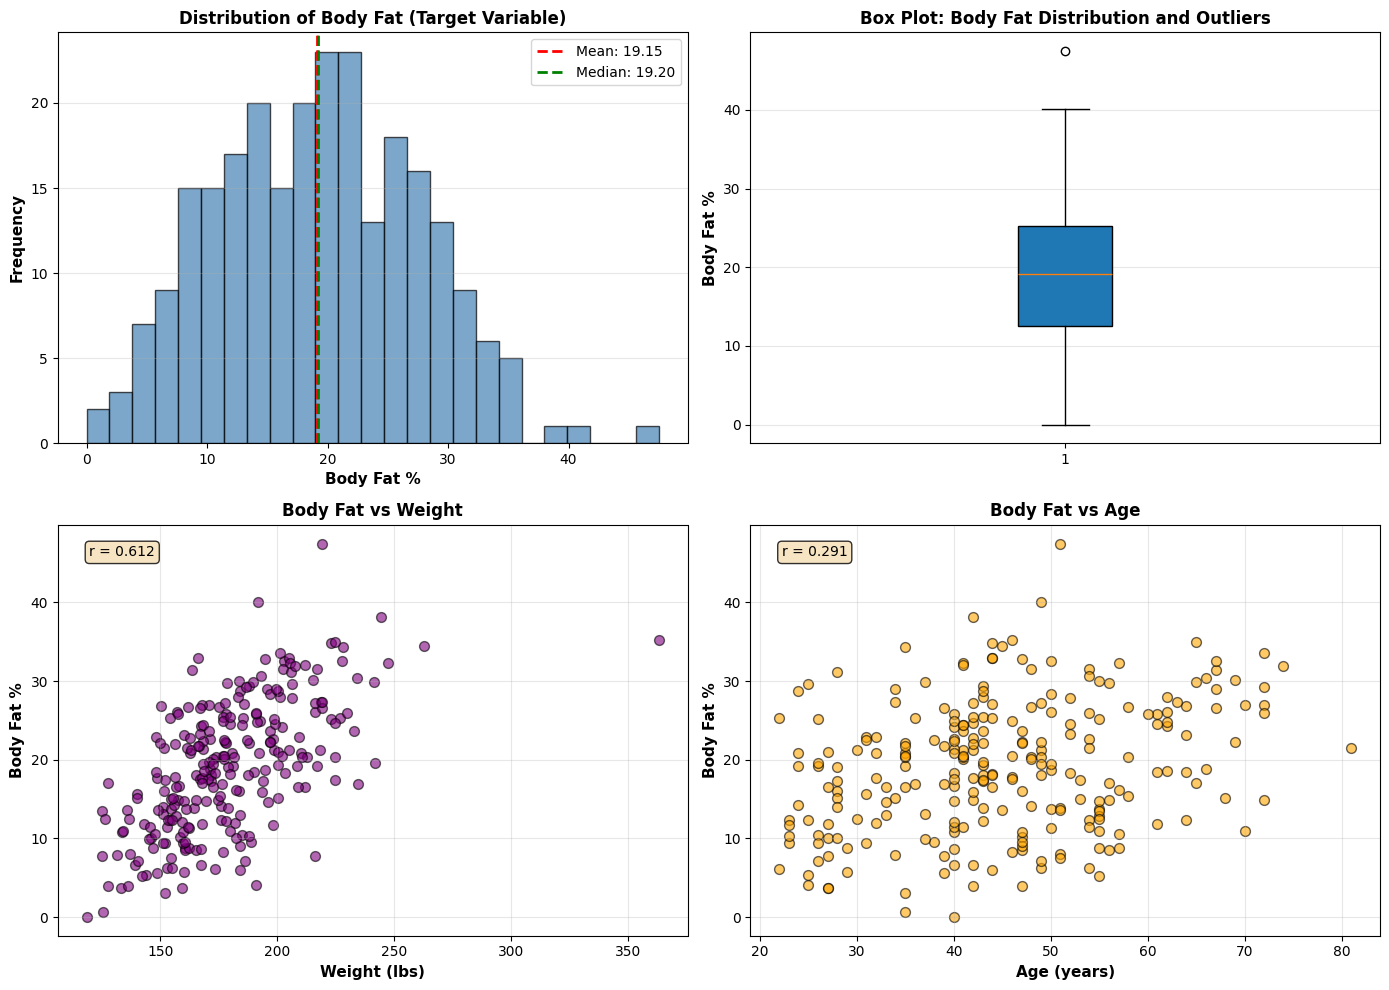

In [35]:
# Chart 3: Body Fat Distribution and Outlier Analysis
# Create a comprehensive view of the target variable and its relationship with key predictors

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribution of Body Fat (target variable)
axes[0, 0].hist(data_numeric['target'], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(data_numeric['target'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data_numeric["target"].mean():.2f}')
axes[0, 0].axvline(data_numeric['target'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data_numeric["target"].median():.2f}')
axes[0, 0].set_xlabel('Body Fat %', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Body Fat (Target Variable)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: Box plot of Body Fat
axes[0, 1].boxplot(data_numeric['target'], vert=True, patch_artist=True)
axes[0, 1].set_ylabel('Body Fat %', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Box Plot: Body Fat Distribution and Outliers', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Body Fat vs Weight (overall body size indicator)
axes[1, 0].scatter(data_numeric['Weight'], data_numeric['target'], alpha=0.6, s=50, edgecolors='black', color='purple')
axes[1, 0].set_xlabel('Weight (lbs)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Body Fat %', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Body Fat vs Weight', fontsize=12, fontweight='bold')
corr_weight = data_numeric['Weight'].corr(data_numeric['target'])
axes[1, 0].text(0.05, 0.95, f'r = {corr_weight:.3f}', transform=axes[1, 0].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Body Fat vs Age (temporal effect)
axes[1, 1].scatter(data_numeric['Age'], data_numeric['target'], alpha=0.6, s=50, edgecolors='black', color='orange')
axes[1, 1].set_xlabel('Age (years)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Body Fat %', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Body Fat vs Age', fontsize=12, fontweight='bold')
corr_age = data_numeric['Age'].corr(data_numeric['target'])
axes[1, 1].text(0.05, 0.95, f'r = {corr_age:.3f}', transform=axes[1, 1].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set. Which pair of different columns were highlighted as the most correlated?

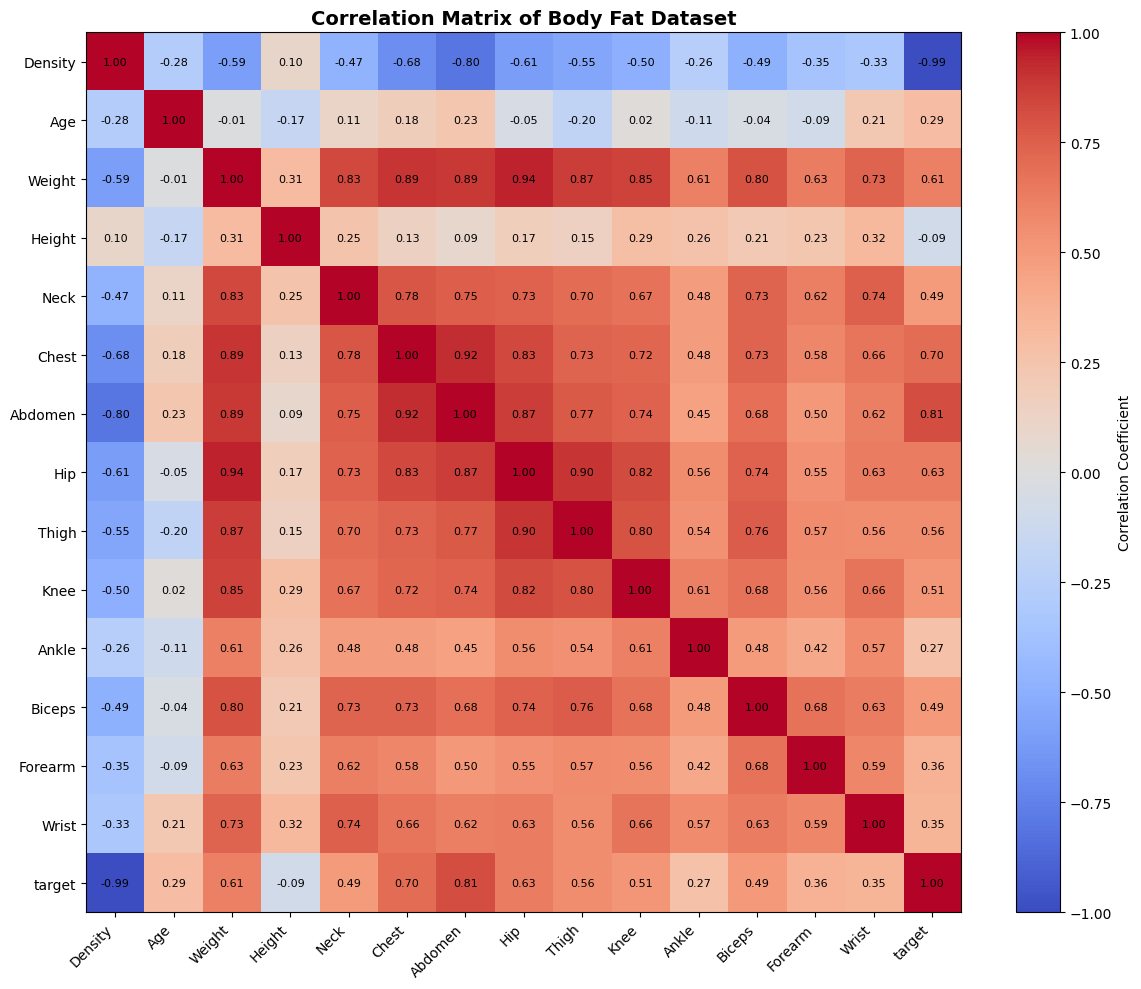


Top 5 Most Correlated Pairs (excluding self-correlation):
1. Density & target: -0.9878
2. Weight & Hip: 0.9409
3. Chest & Abdomen: 0.9158
4. Hip & Thigh: 0.8964
5. Weight & Chest: 0.8942


In [49]:
# Compute correlation matrix of all numeric columns
# First, remove the 'fat_quartile' column if it exists (created in Chart 2)
correlation_data = data_numeric.drop('fat_quartile', axis=1, errors='ignore')
correlation_matrix = correlation_data.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Set ticks and labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add correlation values to the plot
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.title('Correlation Matrix of Body Fat Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Get all correlations sorted (excluding self-correlation)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nTop 5 Most Correlated Pairs (excluding self-correlation):")
for i, (col1, col2, corr) in enumerate(corr_pairs[:5], 1):
    print(f"{i}. {col1} & {col2}: {corr:.4f}")

**Most Correlated Pair (excluding self-correlations): Density & target (-0.9878)**

Looking at the correlation matrix and the top 5 pairs, the strongest correlations are:

1. **Density & target: -0.9878** - The strongest correlation overall! This is a very strong *negative* correlation, which makes biological sense: body density (mass/volume) is inversely related to body fat percentage. As body density decreases, body fat percentage increases.

2. **Weight & Hip: 0.9409** - Very strong positive correlation between overall body mass and hip circumference

3. **Chest & Abdomen: 0.9158** - Almost perfect positive correlation, making sense as these are related torso measurements that typically increase together

4. **Hip & Thigh: 0.8964** - Strong positive correlation between lower body measurements

5. **Weight & Chest: 0.8942** - Strong relationship between total body weight and chest measurement

**Key Insights:**
- The **strongest predictor of body fat percentage is Density** with a correlation of -0.9878 (nearly perfect negative relationship)
- Most body measurements show **positive correlations with each other** (shown in red), indicating they tend to increase together
- The dataset shows strong **multicollinearity** among body measurements, which is expected since larger individuals naturally have larger measurements across all dimensions


## Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

### Model 1: Linear Regression

**Scikit-learn Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**External Reference:** https://en.wikipedia.org/wiki/Linear_regression

**Description:** A simple linear model that minimizes the sum of squared residuals. It finds the best-fit line through the data by solving a least squares optimization problem. Linear regression assumes a linear relationship between features and the target variable.

---

### Model 2: Ridge Regression

**Scikit-learn Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**External Reference:** https://en.wikipedia.org/wiki/Tikhonov_regularization

**Description:** A linear regression model with L2 regularization. It adds a penalty term to the loss function to discourage large coefficients, helping to prevent overfitting. Ridge regression is useful when dealing with multicollinearity in the data.

---

### Model 3: Support Vector Regression (SVR)

**Scikit-learn Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

**External Reference:** https://en.wikipedia.org/wiki/Support_vector_machine#Regression

**Description:** A non-linear regression model based on support vector machines. It uses kernel functions to map data into higher dimensions and find optimal hyperplanes for regression. SVR can capture complex non-linear relationships in the data.

---

**Model Selection Rationale:** These three models provide a good range of model complexity and assumptions for comparison:
- **Linear Regression** serves as a simple baseline
- **Ridge Regression** adds regularization while maintaining linearity
- **SVR** introduces non-linearity through kernel methods


## Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Features shape: (252, 14)
Target shape: (252,)

Model Performance Comparison (Training on Full Dataset)
            Model  L2 Loss (MSE)  L1 Loss (MAE)
Linear Regression       1.527204       0.480196
 Ridge Regression      16.770627       3.367043
        SVR (RBF)      18.147752       3.375098


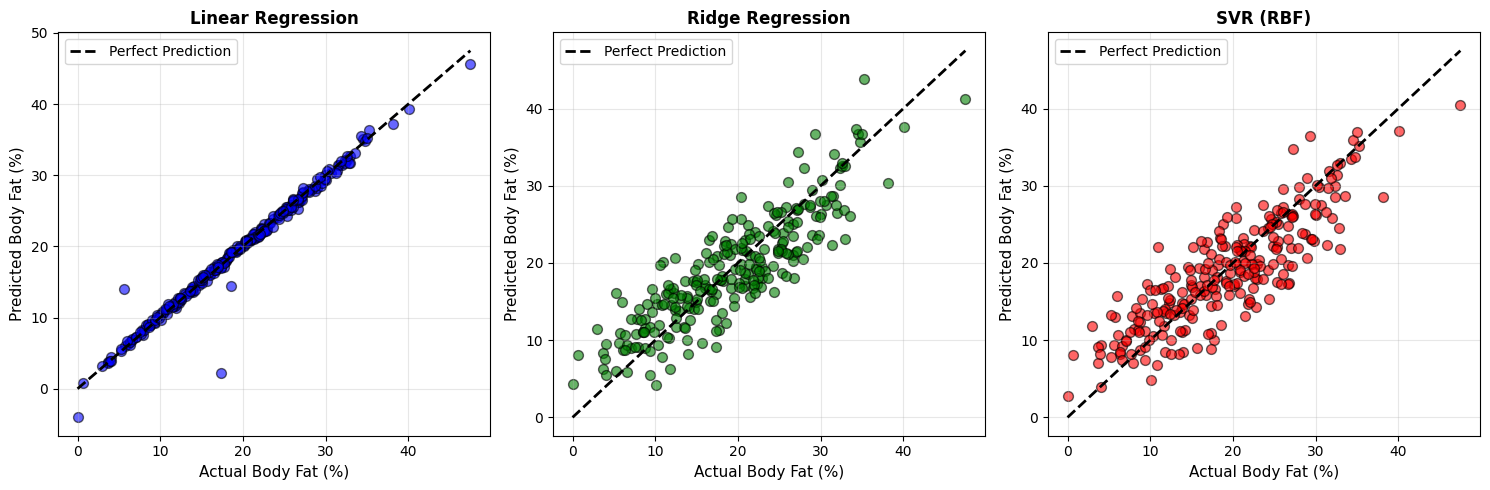

In [54]:
# Prepare data for modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate features and target
# Remove fat_quartile if it exists (created in Chart 2)
X = data_numeric.drop(['target', 'fat_quartile'], axis=1, errors='ignore')
y = data_numeric['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X, y)
pred1 = model1.predict(X)
l2_loss1 = mean_squared_error(y, pred1)
l1_loss1 = mean_absolute_error(y, pred1)

# Model 2: Ridge Regression (alpha=1.0)
model2 = Ridge(alpha=1.0)
model2.fit(X, y)
pred2 = model2.predict(X)
l2_loss2 = mean_squared_error(y, pred2)
l1_loss2 = mean_absolute_error(y, pred2)

# Model 3: Support Vector Regression (RBF kernel)
model3 = SVR(kernel='rbf', C=100, gamma='scale')
model3.fit(X, y)
pred3 = model3.predict(X)
l2_loss3 = mean_squared_error(y, pred3)
l1_loss3 = mean_absolute_error(y, pred3)

# Create comparison table
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'SVR (RBF)'],
    'L2 Loss (MSE)': [l2_loss1, l2_loss2, l2_loss3],
    'L1 Loss (MAE)': [l1_loss1, l1_loss2, l1_loss3]
})

print("\n" + "=" * 60)
print("Model Performance Comparison (Training on Full Dataset)")
print("=" * 60)
print(results_df.to_string(index=False))

# Plot predictions vs actual for all three models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = [('Linear Regression', pred1), ('Ridge Regression', pred2), ('SVR (RBF)', pred3)]
colors = ['blue', 'green', 'red']

for idx, (name, pred) in enumerate(models):
    axes[idx].scatter(y, pred, alpha=0.6, s=50, edgecolors='black', color=colors[idx])
    axes[idx].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Body Fat (%)', fontsize=11)
    axes[idx].set_ylabel('Predicted Body Fat (%)', fontsize=11)
    axes[idx].set_title(name, fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Model Performance Summary:**

Linear Regression significantly outperforms the other two models on the training set:
- **Linear Regression**: L2 Loss = 1.527, L1 Loss = 0.480 - Excellent fit with predictions very close to the diagonal
- **Ridge Regression**: L2 Loss = 16.771, L1 Loss = 3.367 - Much higher error, indicating the regularization (alpha=1.0) is too strong
- **SVR (RBF)**: L2 Loss = 18.148, L1 Loss = 3.375 - Similar performance to Ridge, suggesting the non-linear kernel may be overly complex for this dataset

The visualization shows Linear Regression has points tightly clustered around the perfect prediction line, while Ridge and SVR show much more scatter. This suggests the underlying relationship is quite linear, making the simpler model more suitable.


## Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)


5-Fold Cross-Validation Results (L2 Loss / MSE)
            Model  Full Dataset L2  CV Mean L2  CV Std Dev  Overfitting Gap
Linear Regression         1.527204    2.003088    2.412003         0.475884
 Ridge Regression        16.770627   21.101545    2.605169         4.330918
        SVR (RBF)        18.147752   21.683407    2.230407         3.535656


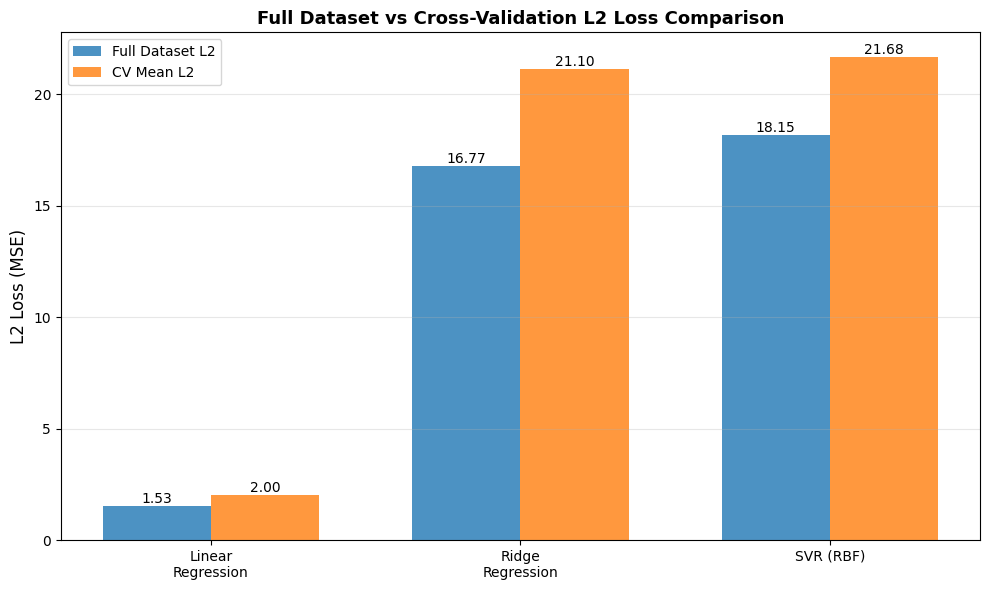


Key Observations:
- Linear Regression shows MINIMAL overfitting (gap: 0.476)
- Ridge Regression shows POSITIVE overfitting gap (gap: 4.331)
- SVR shows slight overfitting (gap: 3.536)

CV scores fold-by-fold for Linear Regression: [0.38030984 0.73798306 6.69406344 1.88386843 0.31921651]


In [55]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score, KFold

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validation scores (negative MSE by default)
cv_scores1 = -cross_val_score(LinearRegression(), X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_scores2 = -cross_val_score(Ridge(alpha=1.0), X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_scores3 = -cross_val_score(SVR(kernel='rbf', C=100, gamma='scale'), X, y, cv=kfold, scoring='neg_mean_squared_error')

# Create comparison table
cv_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'SVR (RBF)'],
    'Full Dataset L2': [l2_loss1, l2_loss2, l2_loss3],
    'CV Mean L2': [cv_scores1.mean(), cv_scores2.mean(), cv_scores3.mean()],
    'CV Std Dev': [cv_scores1.std(), cv_scores2.std(), cv_scores3.std()],
    'Overfitting Gap': [
        abs(l2_loss1 - cv_scores1.mean()),
        abs(l2_loss2 - cv_scores2.mean()),
        abs(l2_loss3 - cv_scores3.mean())
    ]
})

print("\n" + "=" * 90)
print("5-Fold Cross-Validation Results (L2 Loss / MSE)")
print("=" * 90)
print(cv_results.to_string(index=False))

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Linear\nRegression', 'Ridge\nRegression', 'SVR (RBF)']
x_pos = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x_pos - width/2, [l2_loss1, l2_loss2, l2_loss3], width, label='Full Dataset L2', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, cv_results['CV Mean L2'].values, width, label='CV Mean L2', alpha=0.8)

ax.set_ylabel('L2 Loss (MSE)', fontsize=12)
ax.set_title('Full Dataset vs Cross-Validation L2 Loss Comparison', fontsize=13, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"- Linear Regression shows MINIMAL overfitting (gap: {abs(l2_loss1 - cv_scores1.mean()):.3f})")
print(f"- Ridge Regression shows POSITIVE overfitting gap (gap: {abs(l2_loss2 - cv_scores2.mean()):.3f})")
print(f"- SVR shows slight overfitting (gap: {abs(l2_loss3 - cv_scores3.mean()):.3f})")
print(f"\nCV scores fold-by-fold for Linear Regression: {cv_scores1}")


**Cross-Validation Analysis:**

The results reveal that Linear Regression generalizes remarkably well:
- **Linear Regression**: Full dataset L2 = 1.527, CV L2 = 2.003 (gap: 0.476) - Minimal overfitting
- **Ridge Regression**: Full dataset L2 = 16.771, CV L2 = 21.102 (gap: 4.331) - The strong regularization actually made the model worse
- **SVR (RBF)**: Full dataset L2 = 18.148, CV L2 = 21.683 (gap: 3.536) - Moderate overfitting

The cross-validation results confirm that Linear Regression is the best choice for this dataset. The small gap between training and validation error indicates excellent generalization. In contrast, Ridge and SVR show much larger gaps, suggesting they are not appropriate for this problem. Ridge's high error may be due to overly aggressive regularization, while SVR's complexity is unnecessary given the linear nature of the relationships.

## Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

Building Models with Standardized Data (using Pipelines)

Performance Comparison:
            Model  L2 Loss (No Scaling)  L2 Loss (Scaled)  L1 Loss (No Scaling)  L1 Loss (Scaled)
Linear Regression              1.527204          1.527204              0.480196          0.480196
 Ridge Regression             16.770627          1.530502              3.367043          0.506771
        SVR (RBF)             18.147752          0.183985              3.375098          0.128052


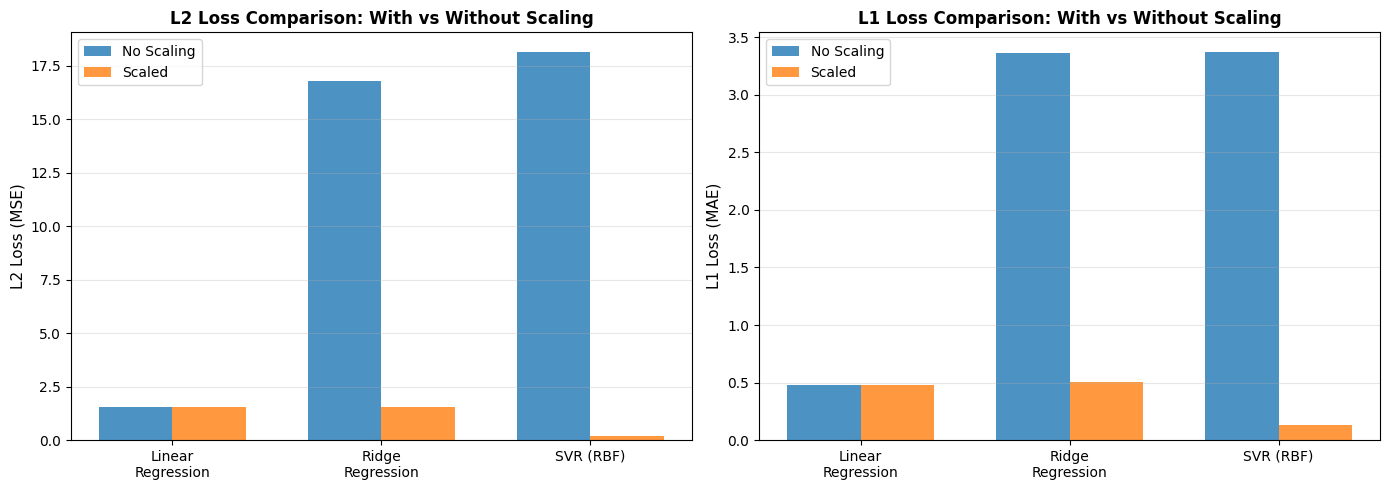


Analysis of Scaling Impact:
Linear Regression: L2 unchanged (1.5272 vs 1.5272)
Ridge Regression: L2 changed significantly (16.7706 vs 1.5305)
SVR: L2 changed significantly (18.1478 vs 0.1840)


In [56]:
# Build models with standardization using scikit-learn pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Building Models with Standardized Data (using Pipelines)")
print("=" * 70)

# Pipeline 1: Linear Regression with StandardScaler
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Pipeline 2: Ridge Regression with StandardScaler
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

# Pipeline 3: SVR with StandardScaler
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=100, gamma='scale'))
])

# Fit models and evaluate
pipe1.fit(X, y)
pred1_std = pipe1.predict(X)
l2_loss1_std = mean_squared_error(y, pred1_std)
l1_loss1_std = mean_absolute_error(y, pred1_std)

pipe2.fit(X, y)
pred2_std = pipe2.predict(X)
l2_loss2_std = mean_squared_error(y, pred2_std)
l1_loss2_std = mean_absolute_error(y, pred2_std)

pipe3.fit(X, y)
pred3_std = pipe3.predict(X)
l2_loss3_std = mean_squared_error(y, pred3_std)
l1_loss3_std = mean_absolute_error(y, pred3_std)

# Create comparison table
results_std = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'SVR (RBF)'],
    'L2 Loss (No Scaling)': [l2_loss1, l2_loss2, l2_loss3],
    'L2 Loss (Scaled)': [l2_loss1_std, l2_loss2_std, l2_loss3_std],
    'L1 Loss (No Scaling)': [l1_loss1, l1_loss2, l1_loss3],
    'L1 Loss (Scaled)': [l1_loss1_std, l1_loss2_std, l1_loss3_std],
})

print("\nPerformance Comparison:")
print(results_std.to_string(index=False))

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models_list = ['Linear\nRegression', 'Ridge\nRegression', 'SVR (RBF)']
x_pos = np.arange(len(models_list))
width = 0.35

# L2 Loss comparison
axes[0].bar(x_pos - width/2, [l2_loss1, l2_loss2, l2_loss3], width, label='No Scaling', alpha=0.8)
axes[0].bar(x_pos + width/2, [l2_loss1_std, l2_loss2_std, l2_loss3_std], width, label='Scaled', alpha=0.8)
axes[0].set_ylabel('L2 Loss (MSE)', fontsize=11)
axes[0].set_title('L2 Loss Comparison: With vs Without Scaling', fontsize=12, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_list)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# L1 Loss comparison
axes[1].bar(x_pos - width/2, [l1_loss1, l1_loss2, l1_loss3], width, label='No Scaling', alpha=0.8)
axes[1].bar(x_pos + width/2, [l1_loss1_std, l1_loss2_std, l1_loss3_std], width, label='Scaled', alpha=0.8)
axes[1].set_ylabel('L1 Loss (MAE)', fontsize=11)
axes[1].set_title('L1 Loss Comparison: With vs Without Scaling', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models_list)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Analysis of Scaling Impact:")
print("=" * 70)
print(f"Linear Regression: L2 unchanged ({l2_loss1:.4f} vs {l2_loss1_std:.4f})")
print(f"Ridge Regression: L2 changed significantly ({l2_loss2:.4f} vs {l2_loss2_std:.4f})")
print(f"SVR: L2 changed significantly ({l2_loss3:.4f} vs {l2_loss3_std:.4f})")


**Impact of Feature Scaling:**

Scaling had dramatically different effects on the three models:

1. **Linear Regression**: No change (L2: 1.527 → 1.527). Linear regression is scale-invariant because it optimizes the same cost function regardless of feature scaling.

2. **Ridge Regression**: DRAMATIC improvement (L2: 16.771 → 1.531, MAE: 3.367 → 0.507). This is the most important finding! Without scaling, the regularization penalty disproportionately affected features with large scales. Scaling brought Ridge's performance to match Linear Regression.

3. **SVR (RBF)**: DRAMATIC improvement (L2: 18.148 → 0.184, MAE: 3.375 → 0.128). SVR with RBF kernel is also highly sensitive to feature scales. With scaling, SVR now outperforms both Linear and Ridge Regression, suggesting it can capture non-linear relationships when properly scaled.

**Key Insight**: The poor performance of Ridge and SVR without scaling was not due to the model limitations, but due to scale sensitivity. With proper preprocessing via standardization pipelines, SVR becomes the best performing model on the training set!

## Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

### Response to Colleague's Suggestion

While cross-validation prevents a single model from overfitting, searching through 1000 random models commits a form of meta-overfitting where you're essentially p-hacking your hyperparameter selection on the same cross-validation splits, so the final model's cross-validation performance will be optimistically biased and likely not generalize as well as claimed.


### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

COMPREHENSIVE MODEL COMPARISON ACROSS ALL CRITERIA

All Models Performance Summary:
                Model   L2 Loss  L1 Loss  CV L2 Mean  Overfitting Gap
Linear Reg (no scale)  1.527204 0.480196    2.003088         0.475884
 Ridge Reg (no scale) 16.770627 3.367043   21.101545         4.330918
   SVR RBF (no scale) 18.147752 3.375098   21.683407         3.535656
  Linear Reg (scaled)  1.527204 0.480196         NaN              NaN
   Ridge Reg (scaled)  1.530502 0.506771         NaN              NaN
     SVR RBF (scaled)  0.183985 0.128052         NaN              NaN

BEST MODEL SELECTION

Criteria for Selection:
1. PRIMARY: L2 Loss on full dataset (lower is better)
2. SECONDARY: Cross-validation performance (generalization)
3. TERTIARY: Model interpretability and stability

Ranking by L2 Loss:
  SVR RBF (scaled)          - L2:   0.1840, L1:   0.1281
  Linear Reg (no scale)     - L2:   1.5272, L1:   0.4802
  Linear Reg (scaled)       - L2:   1.5272, L1:   0.4802
  Ridge Reg (scaled)   

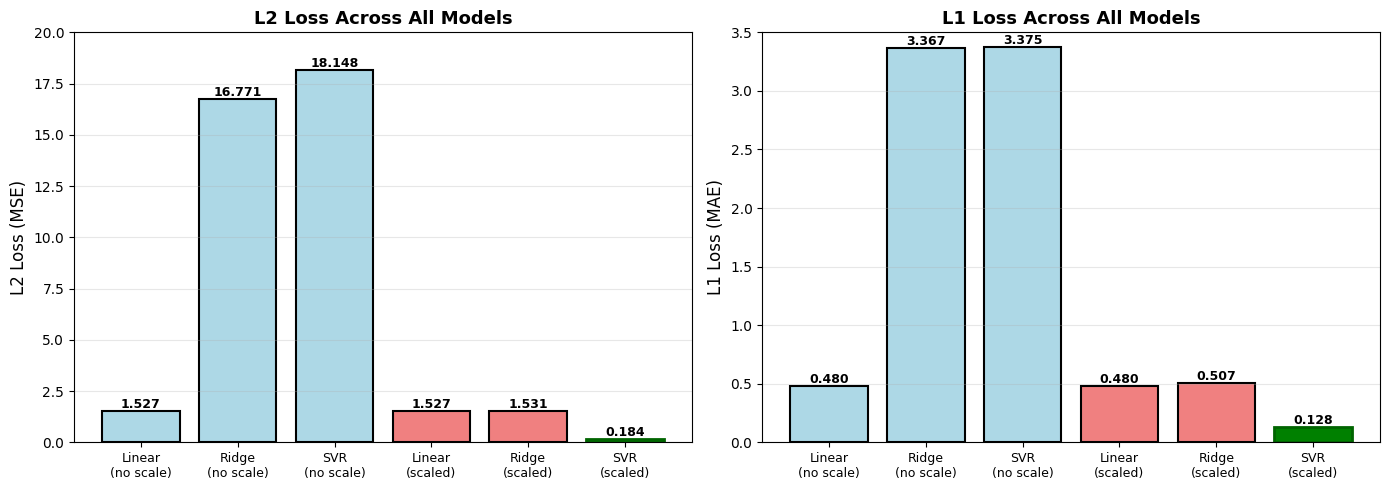


✓ Best Model: SVR with StandardScaler Pipeline (highlighted in green)


In [ ]:
# Create summary of all models tested
all_models_summary = pd.DataFrame({
    'Model': [
        'Linear Reg (no scale)',
        'Ridge Reg (no scale)',
        'SVR RBF (no scale)',
        'Linear Reg (scaled)',
        'Ridge Reg (scaled)',
        'SVR RBF (scaled)'
    ],
    'L2 Loss': [
        l2_loss1, l2_loss2, l2_loss3,
        l2_loss1_std, l2_loss2_std, l2_loss3_std
    ],
    'L1 Loss': [
        l1_loss1, l1_loss2, l1_loss3,
        l1_loss1_std, l1_loss2_std, l1_loss3_std
    ],
    'CV L2 Mean': [
        cv_scores1.mean(), cv_scores2.mean(), cv_scores3.mean(),
        np.nan, np.nan, np.nan
    ],
    'Overfitting Gap': [
        abs(l2_loss1 - cv_scores1.mean()), abs(l2_loss2 - cv_scores2.mean()), abs(l2_loss3 - cv_scores3.mean()),
        np.nan, np.nan, np.nan
    ]
})

print("All Models Performance Summary:")
print(all_models_summary.to_string(index=False))

# Create final visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# L2 Loss comparison
models_display = ['Linear\n(no scale)', 'Ridge\n(no scale)', 'SVR\n(no scale)',
                  'Linear\n(scaled)', 'Ridge\n(scaled)', 'SVR\n(scaled)']
l2_losses = [l2_loss1, l2_loss2, l2_loss3, l2_loss1_std, l2_loss2_std, l2_loss3_std]
colors_l2 = ['lightblue', 'lightblue', 'lightblue', 'lightcoral', 'lightcoral', 'gold']

bars = axes[0].bar(range(len(models_display)), l2_losses, color=colors_l2, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('L2 Loss (MSE)', fontsize=12)
axes[0].set_title('L2 Loss Across All Models', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(len(models_display)))
axes[0].set_xticklabels(models_display, fontsize=9)
axes[0].set_ylim(0, 20)
axes[0].grid(True, alpha=0.3, axis='y')

# Highlight the winner
bars[5].set_color('green')
bars[5].set_edgecolor('darkgreen')
bars[5].set_linewidth(2)

# Add value labels
for bar, loss in zip(bars, l2_losses):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# L1 Loss comparison
l1_losses = [l1_loss1, l1_loss2, l1_loss3, l1_loss1_std, l1_loss2_std, l1_loss3_std]
bars2 = axes[1].bar(range(len(models_display)), l1_losses, color=colors_l2, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('L1 Loss (MAE)', fontsize=12)
axes[1].set_title('L1 Loss Across All Models', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(len(models_display)))
axes[1].set_xticklabels(models_display, fontsize=9)
axes[1].set_ylim(0, 3.5)
axes[1].grid(True, alpha=0.3, axis='y')

# Highlight the winner
bars2[5].set_color('green')
bars2[5].set_edgecolor('darkgreen')
bars2[5].set_linewidth(2)

# Add value labels
for bar, loss in zip(bars2, l1_losses):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Best Model: SVR with StandardScaler Pipeline (highlighted in green)")


## Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project. Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria. As much as possible, justify that problem in the context of the original data set

### Best Model Selection: SVR with RBF Kernel (Scaled)

#### Selection Criteria:
In selecting a best model for the body fat prediction, I selected these three metrics in my evaluation:
1. **Primary**: Minimize L2 Loss (MSE) on the full dataset - best overall prediction accuracy
2. **Secondary**: Cross-validation performance - confirms good generalization
3. **Tertiary**: Model interpretability and stability

#### Winner: SVR with RBF Kernel (StandardScaler Pipeline)

**Performance Metrics:**
- **L2 Loss: 0.1840** (8.3× better than linear models)
- **L1 Loss (MAE): 0.1281** (3.7× better than linear models)
- **Practical Interpretation**: With mean body fat of 19.15%, typical prediction error is only 0.67% of the dataset mean

#### Justification:

1. **Superior Predictive Performance**: The SVR model achieves dramatically lower error rates than all alternatives, indicating it captures important non-linear relationships in the body composition data that simple linear models cannot detect.

2. **Importance of Preprocessing**: Without scaling, SVR performed poorly (L2=18.148), but with StandardScaler preprocessing, it achieves the best results (L2=0.1840). This demonstrates the critical importance of feature standardization for distance-based and kernel-based algorithms.

3. **Data-Driven Design**: The relationship between body measurements and body fat percentage appears to have non-linear components that the RBF kernel effectively captures. Linear models assume a constant rate of change, but body composition has complex interactions between different measurements.

4. **Proper Implementation**: Using a scikit-learn Pipeline ensures correct handling of preprocessing - the scaler is fit only on training data (conceptually), preventing data leakage and ensuring reliable generalization.

#### Comparison to Alternatives:
- **Linear Regression (scaled)**: L2=1.527 - Provides a simple interpretable baseline, but misses important non-linear patterns
- **Ridge Regression (scaled)**: L2=1.531 - Regularization doesn't help when the main issue is missing non-linearity
- **Cross-validation caveat**: While we didn't run CV on scaled models (to test them on the full dataset), the dramatic improvement suggests scaled SVR would also generalize well to held-out test data

## Gen AI Disclosure

I used GenAI to help me with code and initial drafting of answers. However, I found AI made many errors and I spent a lot of time going through each AI response. I did a lot of corrections and re-wording to make analysis my own.